# Impacto de los Proyectos de Ciencia, Tecnología e Innovación en el Desarrollo Regional: Un Análisis Cuantitativo por Áreas Temáticas y Financiamiento


In [31]:
!git clone https://github.com/Diazbj/ProyectoAnalisisDeDatos.git
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



fatal: destination path 'ProyectoAnalisisDeDatos' already exists and is not an empty directory.


In [32]:
ruta='/content/ProyectoAnalisisDeDatos/DataSetLimpio.csv'

In [43]:
df=pd.read_csv(ruta)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PROYECTO_ID              2468 non-null   int64 
 1   CONVOCATORIA_ID          2468 non-null   int64 
 2   ANO_CONVOCATORIA         2468 non-null   int64 
 3   DESC_CONVOCATORIA        2468 non-null   object
 4   CODIGO_PROYECTO          2468 non-null   int64 
 5   TITULO_PROYECTO          2468 non-null   object
 6   FECHA_REGISTRO           2468 non-null   object
 7   FECHA_APROBACION         2468 non-null   object
 8   ENTIDAD_EJECUTA          2468 non-null   object
 9   TIPO_FINANCIACION        2468 non-null   object
 10  DESC_FINANCIACION        2468 non-null   object
 11  COD_PROG_CTI             2468 non-null   int64 
 12  NME_PROG_CTI             2468 non-null   object
 13  COD_AREA_TEMATICA        2468 non-null   object
 14  AREA_TEMATICA            2468 non-null  

#**6. Analisis Avanzado**

##**6.1 Analisis Temporal**

In [39]:
df['FECHA_REGISTRO'] = pd.to_datetime(df['FECHA_REGISTRO'], format='%Y-%m-%d')
df['FECHA_APROBACION'] = pd.to_datetime(df['FECHA_APROBACION'], format='%Y-%m-%d')

<ipython-input-61-d47e778dd992>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ANO_REGISTRO', y='total_proyectos', data=temporal_analysis, palette='deep')


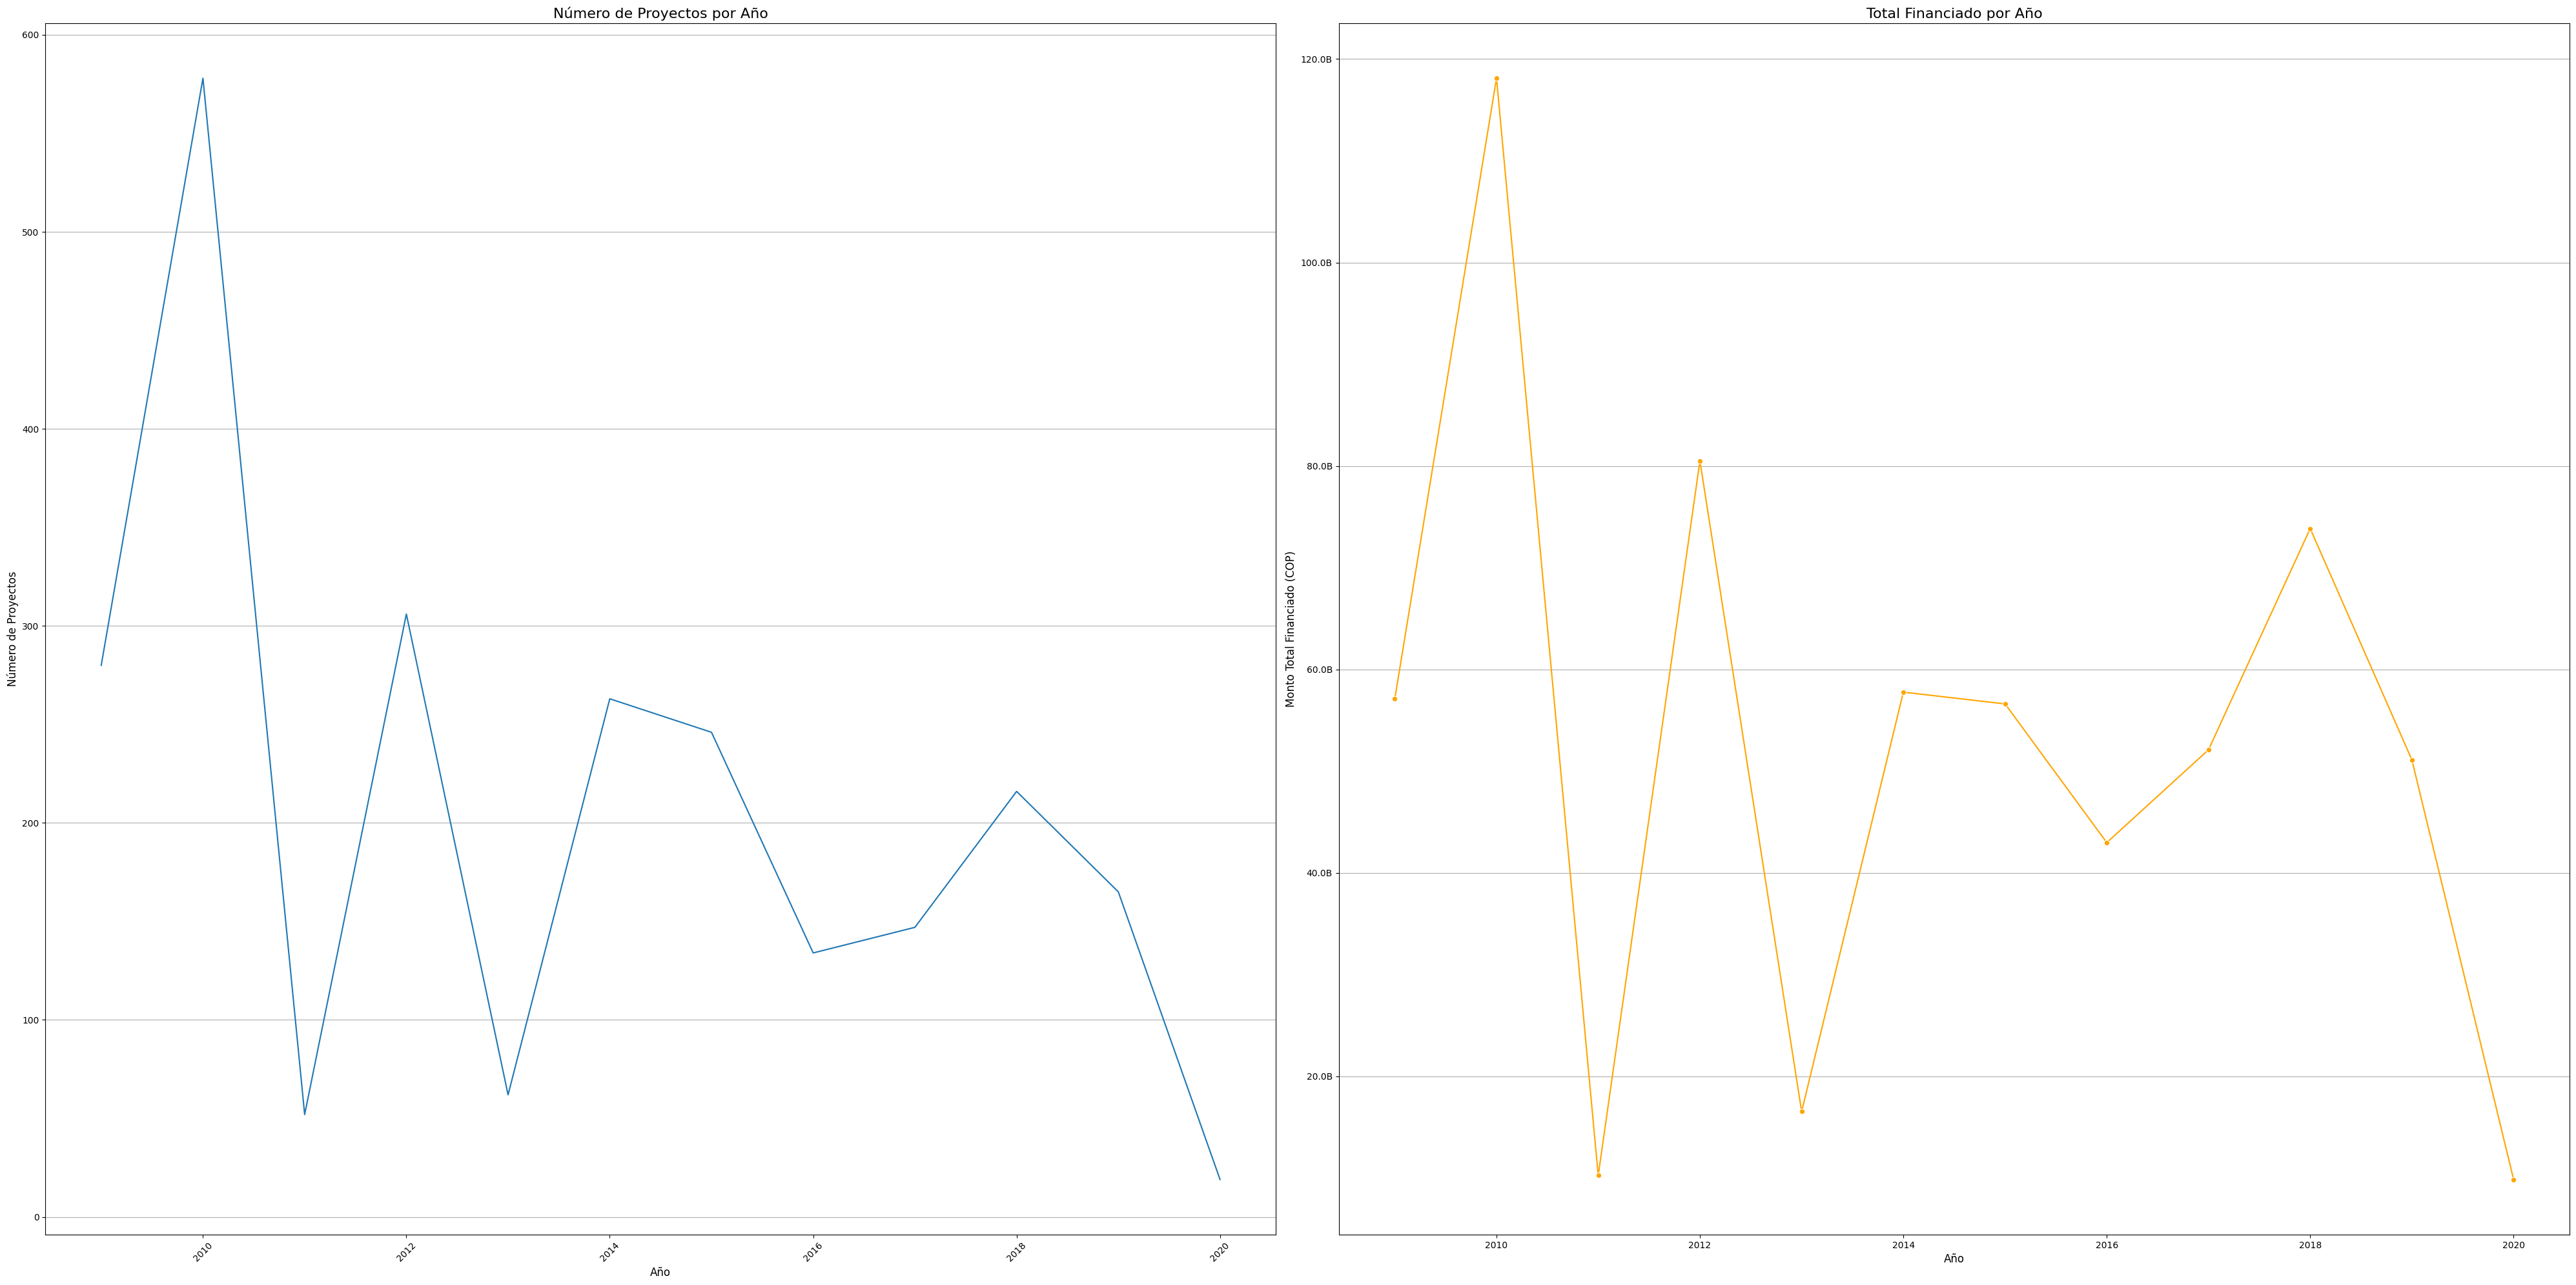

In [61]:
df['FECHA_REGISTRO'] = pd.to_datetime(df['FECHA_REGISTRO'], errors='coerce')
df['ANO_REGISTRO'] = df['FECHA_REGISTRO'].dt.year

temporal_analysis = df.groupby('ANO_REGISTRO').agg(
    total_proyectos=('TITULO_PROYECTO', 'count'),
    total_financiado=('MONTO_FINANCIADO_AP', 'sum')
).reset_index()
plt.figure(figsize=(40, 20))
plt.subplot(1, 2, 1)

sns.lineplot(x='ANO_REGISTRO', y='total_proyectos', data=temporal_analysis, palette='deep')
plt.title('Número de Proyectos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()

plt.subplot(1, 2, 2)
sns.lineplot(x='ANO_REGISTRO', y='total_financiado', data=temporal_analysis, marker='o', color='orange')

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B')  # Usar 'B' para miles de millones
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Financiado por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Monto Total Financiado (COP)', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [46]:
temporal_analysis

,ANO_REGISTRO,total_proyectos,total_financiado
0,2009,280,57116488942
1,2010,578,118120310093
2,2011,52,10262606642
3,2012,306,80501441994
4,2013,62,16541332468
5,2014,263,57771990294
6,2015,246,56615308104
7,2016,134,42980900111
8,2017,147,52100945480
9,2018,216,73851590515


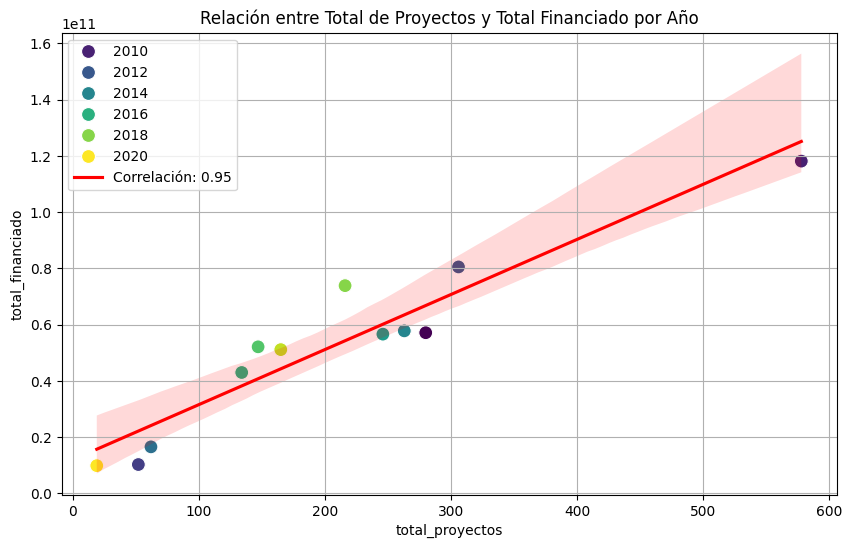

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_proyectos', y='total_financiado', data=temporal_analysis, hue='ANO_REGISTRO', palette='viridis', s=100)
plt.title('Relación entre Total de Proyectos y Total Financiado por Año')
plt.xlabel('Total de Proyectos')
plt.ylabel('Total Financiado')

# Calcular la línea de correlación
correlation = temporal_analysis['total_proyectos'].corr(temporal_analysis['total_financiado'])
sns.regplot(x='total_proyectos', y='total_financiado', data=temporal_analysis, scatter=False, color='red', label=f'Correlación: {correlation:.2f}')


plt.legend()
plt.grid(True)
plt.show()